<a href="https://colab.research.google.com/github/arventa/arlan_april/blob/main/Arlan_Arventa_Data_Engineer_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering, AffinityPropagation
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from scipy.stats import skew

In [ ]:
file="/content/sample_data/ingredient.csv"

In [ ]:
data_ingredient=pd.read_csv(file)
data_ingredient.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [ ]:
# Summary Statistics and Variance
print("Summary Statistics")
print(data_ingredient.describe())

print("Standard Deviation")
print(np.round(data_ingredient.std(), 3))


Summary Statistics
                a           b           c           d           e           f  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

                g           h           i  
count  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009  
std      1.423153    0.497219    0.097439  
min      5.430000    0.000000    0.000000  
25%      8.240000    0.000000  

Note: Attributes a and i have low variance.

In [ ]:
cor_table = data_ingredient.corr().round(3)
print(cor_table)

       a      b      c      d      e      f      g      h      i
a  1.000 -0.192 -0.122 -0.407 -0.542 -0.290  0.810 -0.000  0.143
b -0.192  1.000 -0.274  0.157 -0.070 -0.266 -0.275  0.327 -0.241
c -0.122 -0.274  1.000 -0.482 -0.166  0.005 -0.444 -0.492  0.083
d -0.407  0.157 -0.482  1.000 -0.006  0.326 -0.260  0.479 -0.074
e -0.542 -0.070 -0.166 -0.006  1.000 -0.193 -0.209 -0.102 -0.094
f -0.290 -0.266  0.005  0.326 -0.193  1.000 -0.318 -0.043 -0.008
g  0.810 -0.275 -0.444 -0.260 -0.209 -0.318  1.000 -0.113  0.125
h -0.000  0.327 -0.492  0.479 -0.102 -0.043 -0.113  1.000 -0.059
i  0.143 -0.241  0.083 -0.074 -0.094 -0.008  0.125 -0.059  1.000


Note:

Attributes a and g have a very high correlation.

Attributes a and e have a low correlation.

Attributes c and d have a low correlation

<Figure size 1000x1000 with 0 Axes>

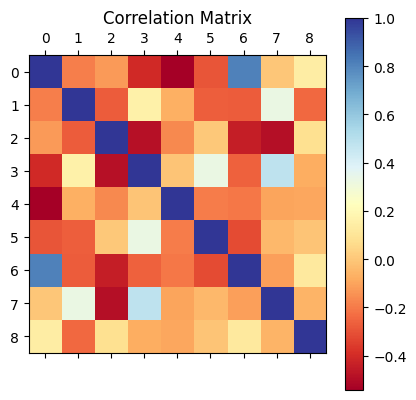

In [ ]:
plt.figure(figsize=(10, 10))
plt.matshow(cor_table, cmap='RdYlBu')
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

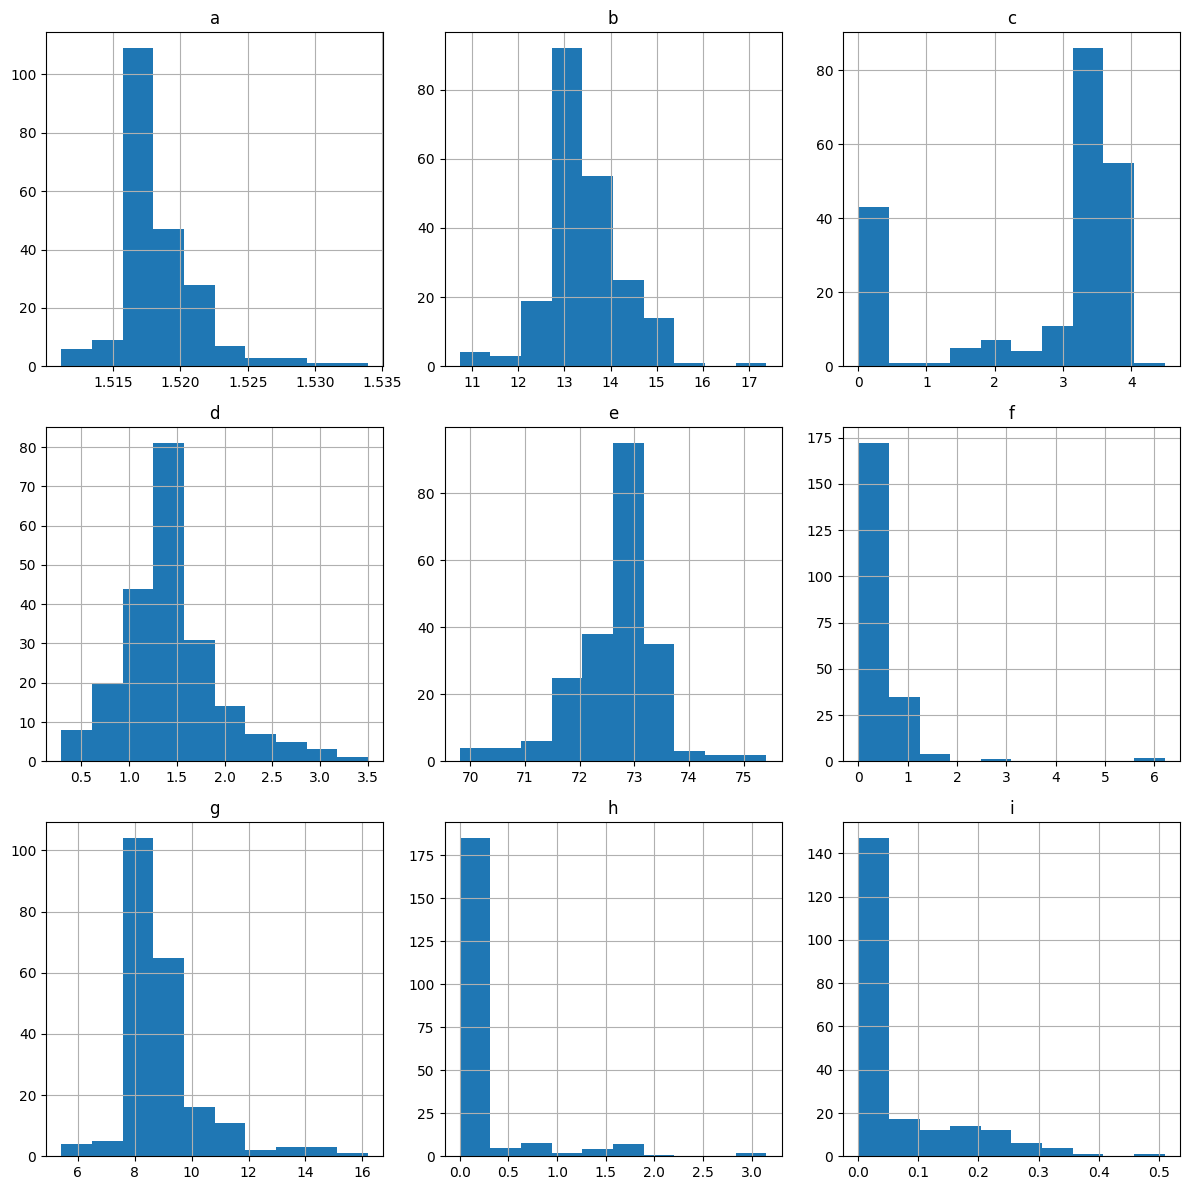

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for i, col_name in enumerate(data_ingredient.columns):
    row, col = i // 3, i % 3
    data_ingredient[col_name].hist(ax=axes[row, col]) # Remove title from here
    axes[row, col].set_title(col_name) # Set the title for the subplot
plt.tight_layout()
plt.show()

In [ ]:
# Check for zero-inflation
print("Zero-inflated")
print(data_ingredient.eq(0).sum())

print("Skewness")
print(np.round(data_ingredient.skew(), 3))

Zero-inflated
a      0
b      0
c     42
d      0
e      0
f     30
g      0
h    176
i    144
dtype: int64
Skewness
a    1.625
b    0.454
c   -1.153
d    0.907
e   -0.730
f    6.552
g    2.047
h    3.416
i    1.754
dtype: float64


Note:

Attributes a, d, f and g are right-skewed

Attributes c, h, f and i are zero-inflated

Attribute c is bi-modal

Attribute e is left-skewed.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


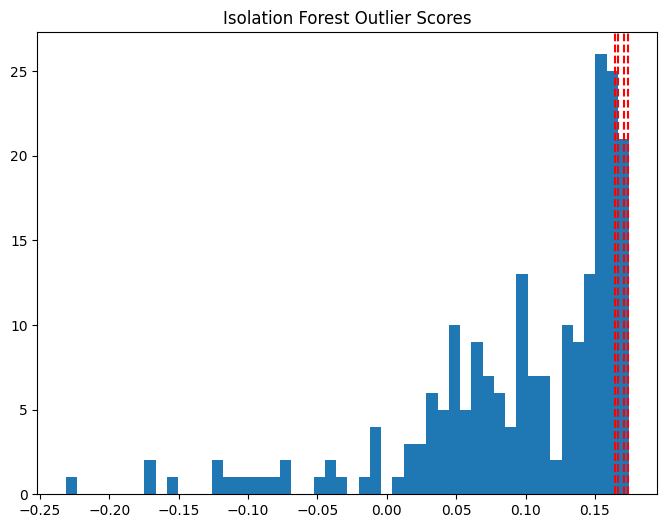

In [ ]:
isf = IsolationForest(contamination=0.1)
isf.fit(data_ingredient)
outlier_scores = isf.decision_function(data_ingredient)
plt.figure(figsize=(8, 6))
plt.title("Isolation Forest Outlier Scores")
plt.hist(outlier_scores, bins=50)
plt.axvline(np.quantile(outlier_scores, 0.85), color='r', linestyle='--')
plt.axvline(np.quantile(outlier_scores, 0.90), color='r', linestyle='--')
plt.axvline(np.quantile(outlier_scores, 0.95), color='r', linestyle='--')
plt.axvline(np.quantile(outlier_scores, 0.99), color='r', linestyle='--')
plt.show()

Note:  No significant problem of outliers.

In [ ]:
# Normalization
scaler = MinMaxScaler()
train_ingredient = scaler.fit_transform(data_ingredient)
print("Normalized Data Summary:")
print(pd.DataFrame(train_ingredient, columns=data_ingredient.columns).describe())

Normalized Data Summary:
                a           b           c           d           e           f  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     0.316744    0.402684    0.597891    0.359784    0.507310    0.080041   
std      0.133313    0.122798    0.321249    0.155536    0.138312    0.105023   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.235843    0.327444    0.471047    0.280374    0.441071    0.019726   
50%      0.286655    0.386466    0.775056    0.333333    0.532143    0.089372   
75%      0.351514    0.465414    0.801782    0.417445    0.585268    0.098229   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

                g           h           i  
count  214.000000  214.000000  214.000000  
mean     0.327785    0.055570    0.111783  
std      0.132263    0.157847    0.191056  
min      0.000000    0.000000    0.000000  
25%      0.261152    0.00

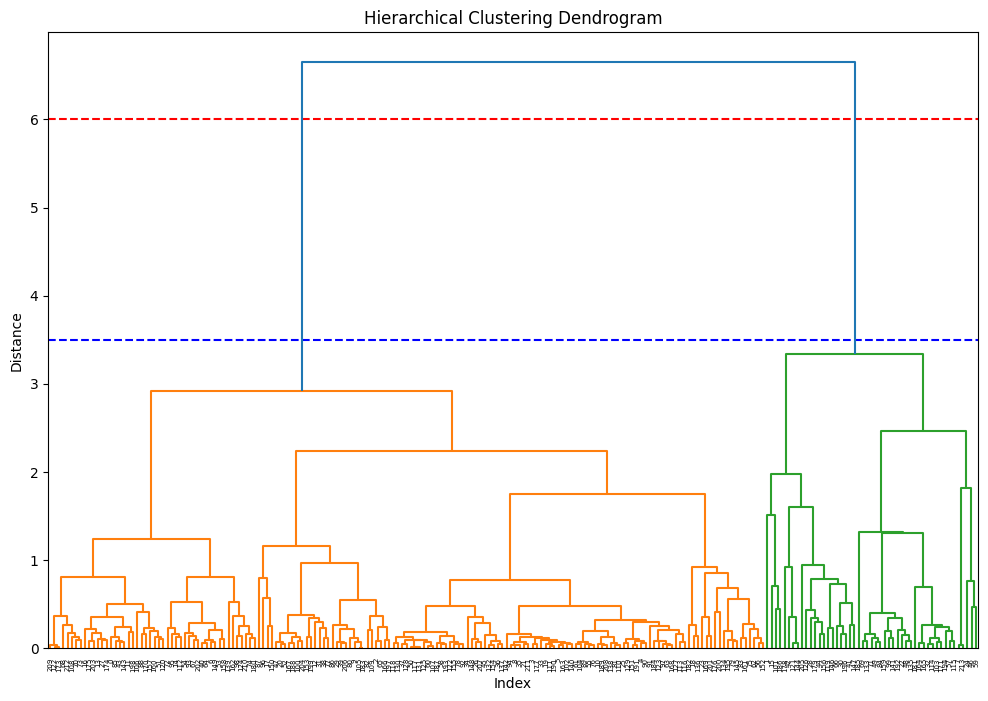

In [ ]:
# Hierarchical Agglomerative Clustering - Dendrogram
dist_matrix = pdist(train_ingredient)
# Set the number of clusters or distance threshold
linkage_matrix = linkage(train_ingredient, method='ward') # Compute the linkage matrix directly
plt.figure(figsize=(12, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.axhline(y=6, color='r', linestyle='--')
plt.axhline(y=3.5, color='b', linestyle='--')
dendrogram(linkage_matrix) # Call dendrogram directly, it's already imported
plt.show()

Note: 5-Cluster/ 7-Cluster solution is fine

In [ ]:
# Affinity Propagation
ap = AffinityPropagation()
ap.fit(train_ingredient)
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_

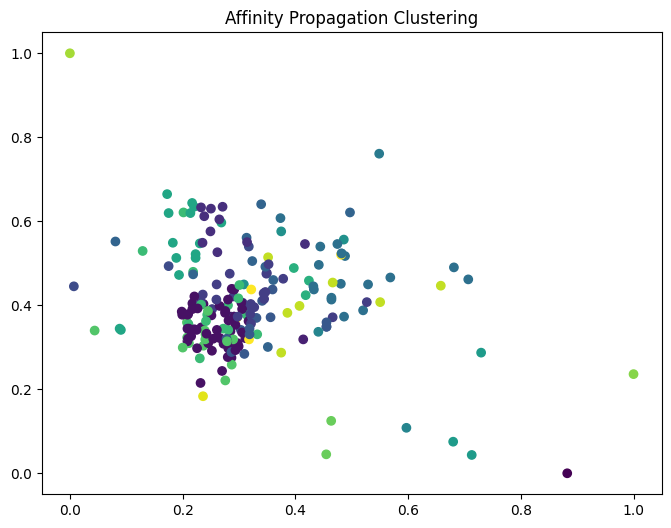

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(train_ingredient[:, 0], train_ingredient[:, 1], c=labels)
plt.title('Affinity Propagation Clustering')
plt.show()

Note : 4-Cluster solution

In [ ]:
# Gaussian Mixture Model
gmm = GaussianMixture(n_components=data_ingredient.shape[1])
gmm.fit(train_ingredient)
print("Gaussian Mixture Model Summary:")
print(gmm)

Gaussian Mixture Model Summary:
GaussianMixture(n_components=9)
